# Differential Equations Report on Assignment 1 (Numerical Methods)


github link is here: https://github.com/dariamikl/Numerical-methods-project
By Miklashevskaya Daria, Innopolis Universitym, BS17-02

In [158]:
# Exact solution of the Initial Value problem

$$y'\:=\:\frac{y}{x}+\frac{x}{y}$$ 

$$y'\:-\frac{1}{x}y=xy^{-1}$$ 
First-order Bernoulli differential equation

Using substitution: 
$$v=y^{1-n}$$

We get: $$\frac{ν'\left(x\right)}{2}-\frac{ν\left(x\right)}{x}=x$$

After integration: $$ν\left(x\right)=2\ln \left(x\right)x^2+c_1x^2$$

Substituting back $$ν\left(x\right)=y^2$$

We get: $$y^2=2\ln \left(x\right)x^2+c_1x^2$$

We get: $$y=x\left(-\sqrt{c_1+2\ln \left(x\right)}\right),\:y=x\sqrt{c_1+2\ln \left(x\right)}$$

In [159]:
import pandas as pd

In [160]:
l = {'y0':[1],'x0':[1], 'xb':[2.3]}
init = pd.DataFrame(data = l)

In [161]:
init.head()

,y0,x0,xb
0,1,1,2.3


#### Finding c1

Since X lies in the positive x-axis, we take into consideration one of the solutions, since the root can not be negative.

Substituting initial value: $$1=\sqrt{c_1+2\ln \left(1\right)}=\sqrt{c_1}$$

We get, that c1=1, then for this IVP: $$y=x\sqrt{1+2\ln \left(x\right)}$$


# Structure of the program

The program has the following methods:
- **euler** (Euler method implementation),
- **improved_euler** (Improved Euler method implementation)
- **f** (Helper function for calculating f(x,y))
- **runge_kutta** (Runge-Kutta method implementation)
- **exact** (Calculation of exact values of the function for estimating the error)
- **graph** (For graphing the forementioned four functions with the ability of chnaging initial values and the grid step)
- **sub** (Inner submethod for array substraction)
- **err** (Method for outputting the error)

# Procedures diagram


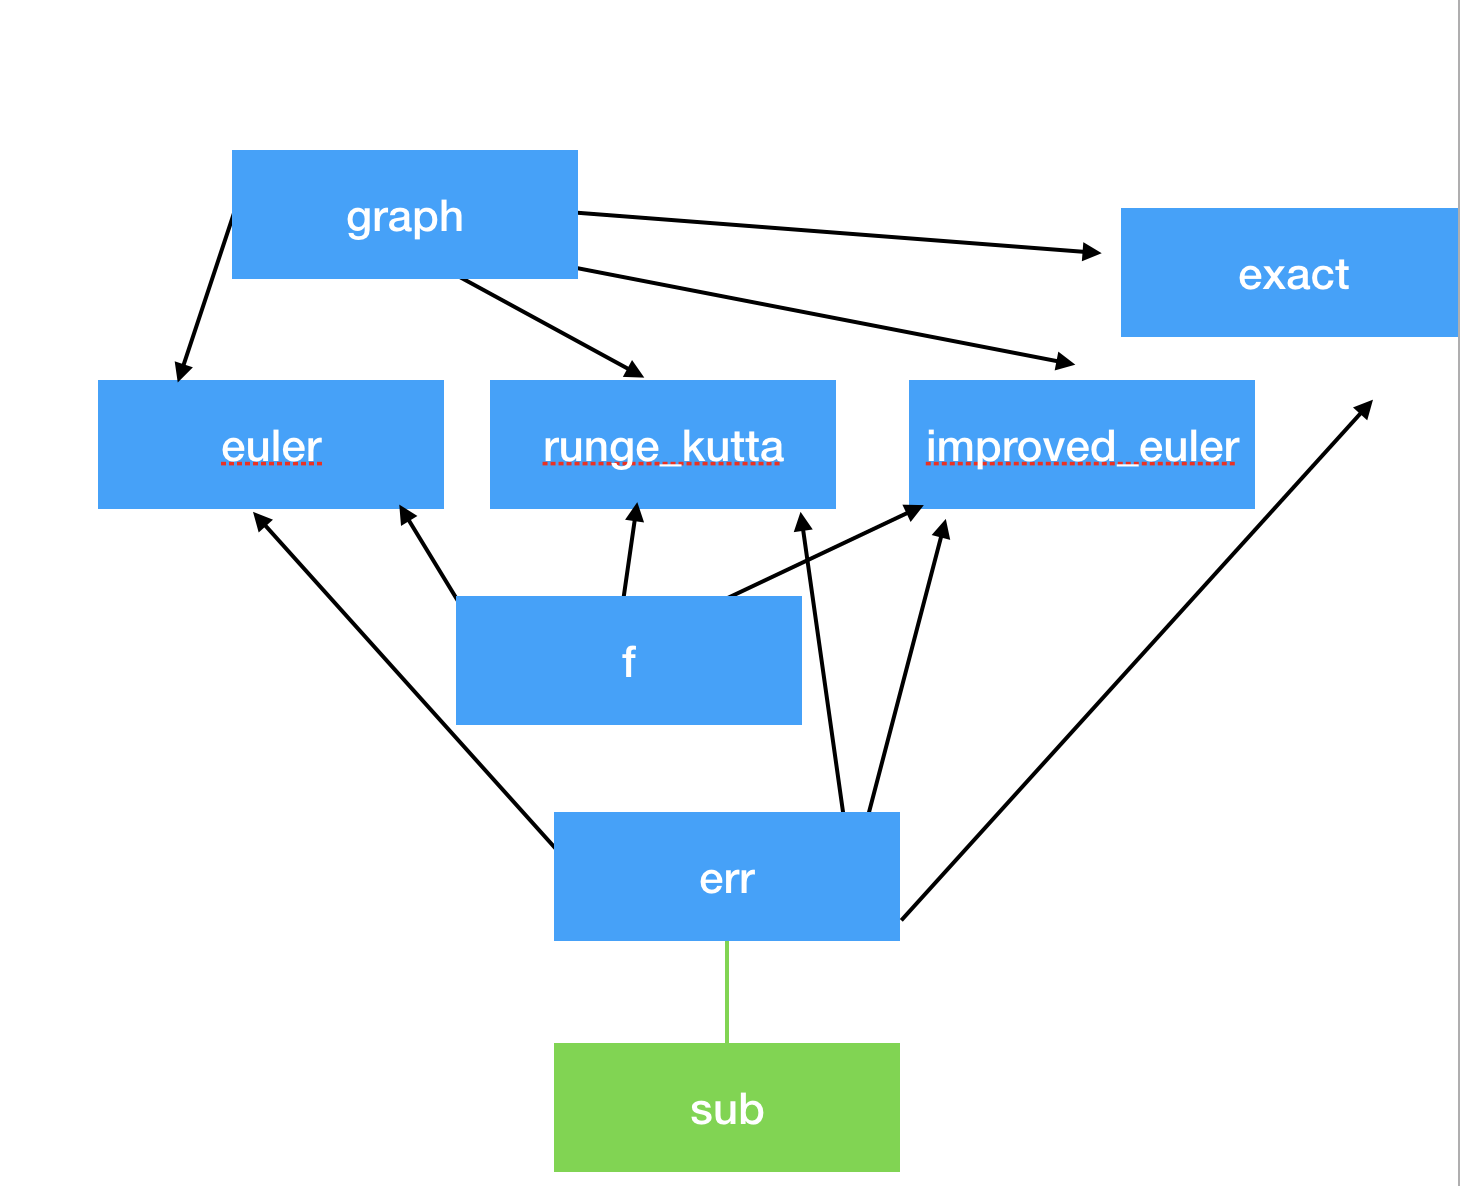

In [162]:
from IPython.display import Image
Image(filename='graphde.png')

# Description of the methods

Calculating the step: $h\:=\:\frac{xb\:-\:x0}{n}$

Calculating x: $xi\:=\:x0\:+\:i\cdot h$


**Euler method**: $y_{i+1}=y_{i}+hf\left(x_{i},\:y_{i})\right)$ which is derived simply from the equation of the tangent line the assumption that tangent line to the integral curve approximates the intergal curve

In [163]:
def euler(n, y0, x0, xb):
    h = (xb-x0)/float(n) #the step
    x = np.linspace(x0, xb, n) #array of x's with equally spaces intervals (same as h)
    y = np.zeros([n]) #fill initial vals with 0
    y[0] = y0
    for i in range (1,n):
        y[i] = y[i-1] + h*f(x[i-1], y[i-1]) #here is the main formula but starting from i, not i+1
    return [x, y]

**Improved Euler method** uses the concept of the average of the slopes of the tangents to the integral curve:

$y_{i+1}=y_i+\:\frac{h}{2}\left(f\left(x_i,\:y_i\right)\:+\:y_{p}\right)$

where $y_{p} = f\left(x_{i+1},\:y_i+hf\left(x_i,\:y_i\right)\right)$

In [164]:
def improved_euler(n, y0, x0, xb):
    h = (xb-x0)/float(n) #the step
    x = np.linspace(x0, xb, n) #array of x's with equally spaces intervals (same as h)
    y = np.zeros([n]) #fill initial vals with 0
    y_p = np.zeros([n]) #same for y_p
    y_p[0]=-1
    y[0] = y0
    for i in range (1,n):
        y_p[i]=y[i-1] + h*f(x[i-1], y[i-1]) #y_p
        y[i] = y[i-1] + (h/2)*(f(x[i-1], y[i-1]) + f(x[i], y_p[i])) #here is the main formula but starting from i, not i+1
    return [x,y]

**Runge Kutta method** with k=4, the most widely used method:

$k_{1i}=f\left(x_i,\:y_i\right)$

$k_{2i}=f\left(x_i+\frac{h}{2},\:y_i+\frac{h}{2}k_{1i}\right)$

    

$k_{3i}=f\left(x_i+\frac{h}{2},\:y_i+\frac{h}{2}k_{2i}\right)$

$k_{4i}=f\left(x_i+h,\:y_i+hk_{3i}\right)$


$y_{i+1}=y_i+\frac{h}{6}\left(k_{1i}+2k_{2i}+2k_{3i}+k_{4i}\right)$

In [165]:
def runge_kutta(n, y0, x0, xb):
    h = (xb-x0)/float(n) #the step
    x = np.linspace(x0, xb, n) #filling out x's
    y = np.zeros([n]) #y's initialization
    y[0] = y0
    for i in range (1,n):
        k1 = h*f(x[i-1], y[i-1]) #multiplied by h here
        k2 = h*f(x[i-1] + (h*0.5), y[i-1] + (k1*0.5))
        k3 = h*f(x[i-1] + (h*0.5), y[i-1] + (k2*0.5))
        k4 = h*f(x[i-1] + h, y[i-1] + k3)
        delta_y = (k1+2*k2+2*k3+k4)/6 #since all k's are already multiplied by h, no need to do it here
        y[i] = y[i-1] + delta_y #main formula
    return [x,y]

# Display of the graphs

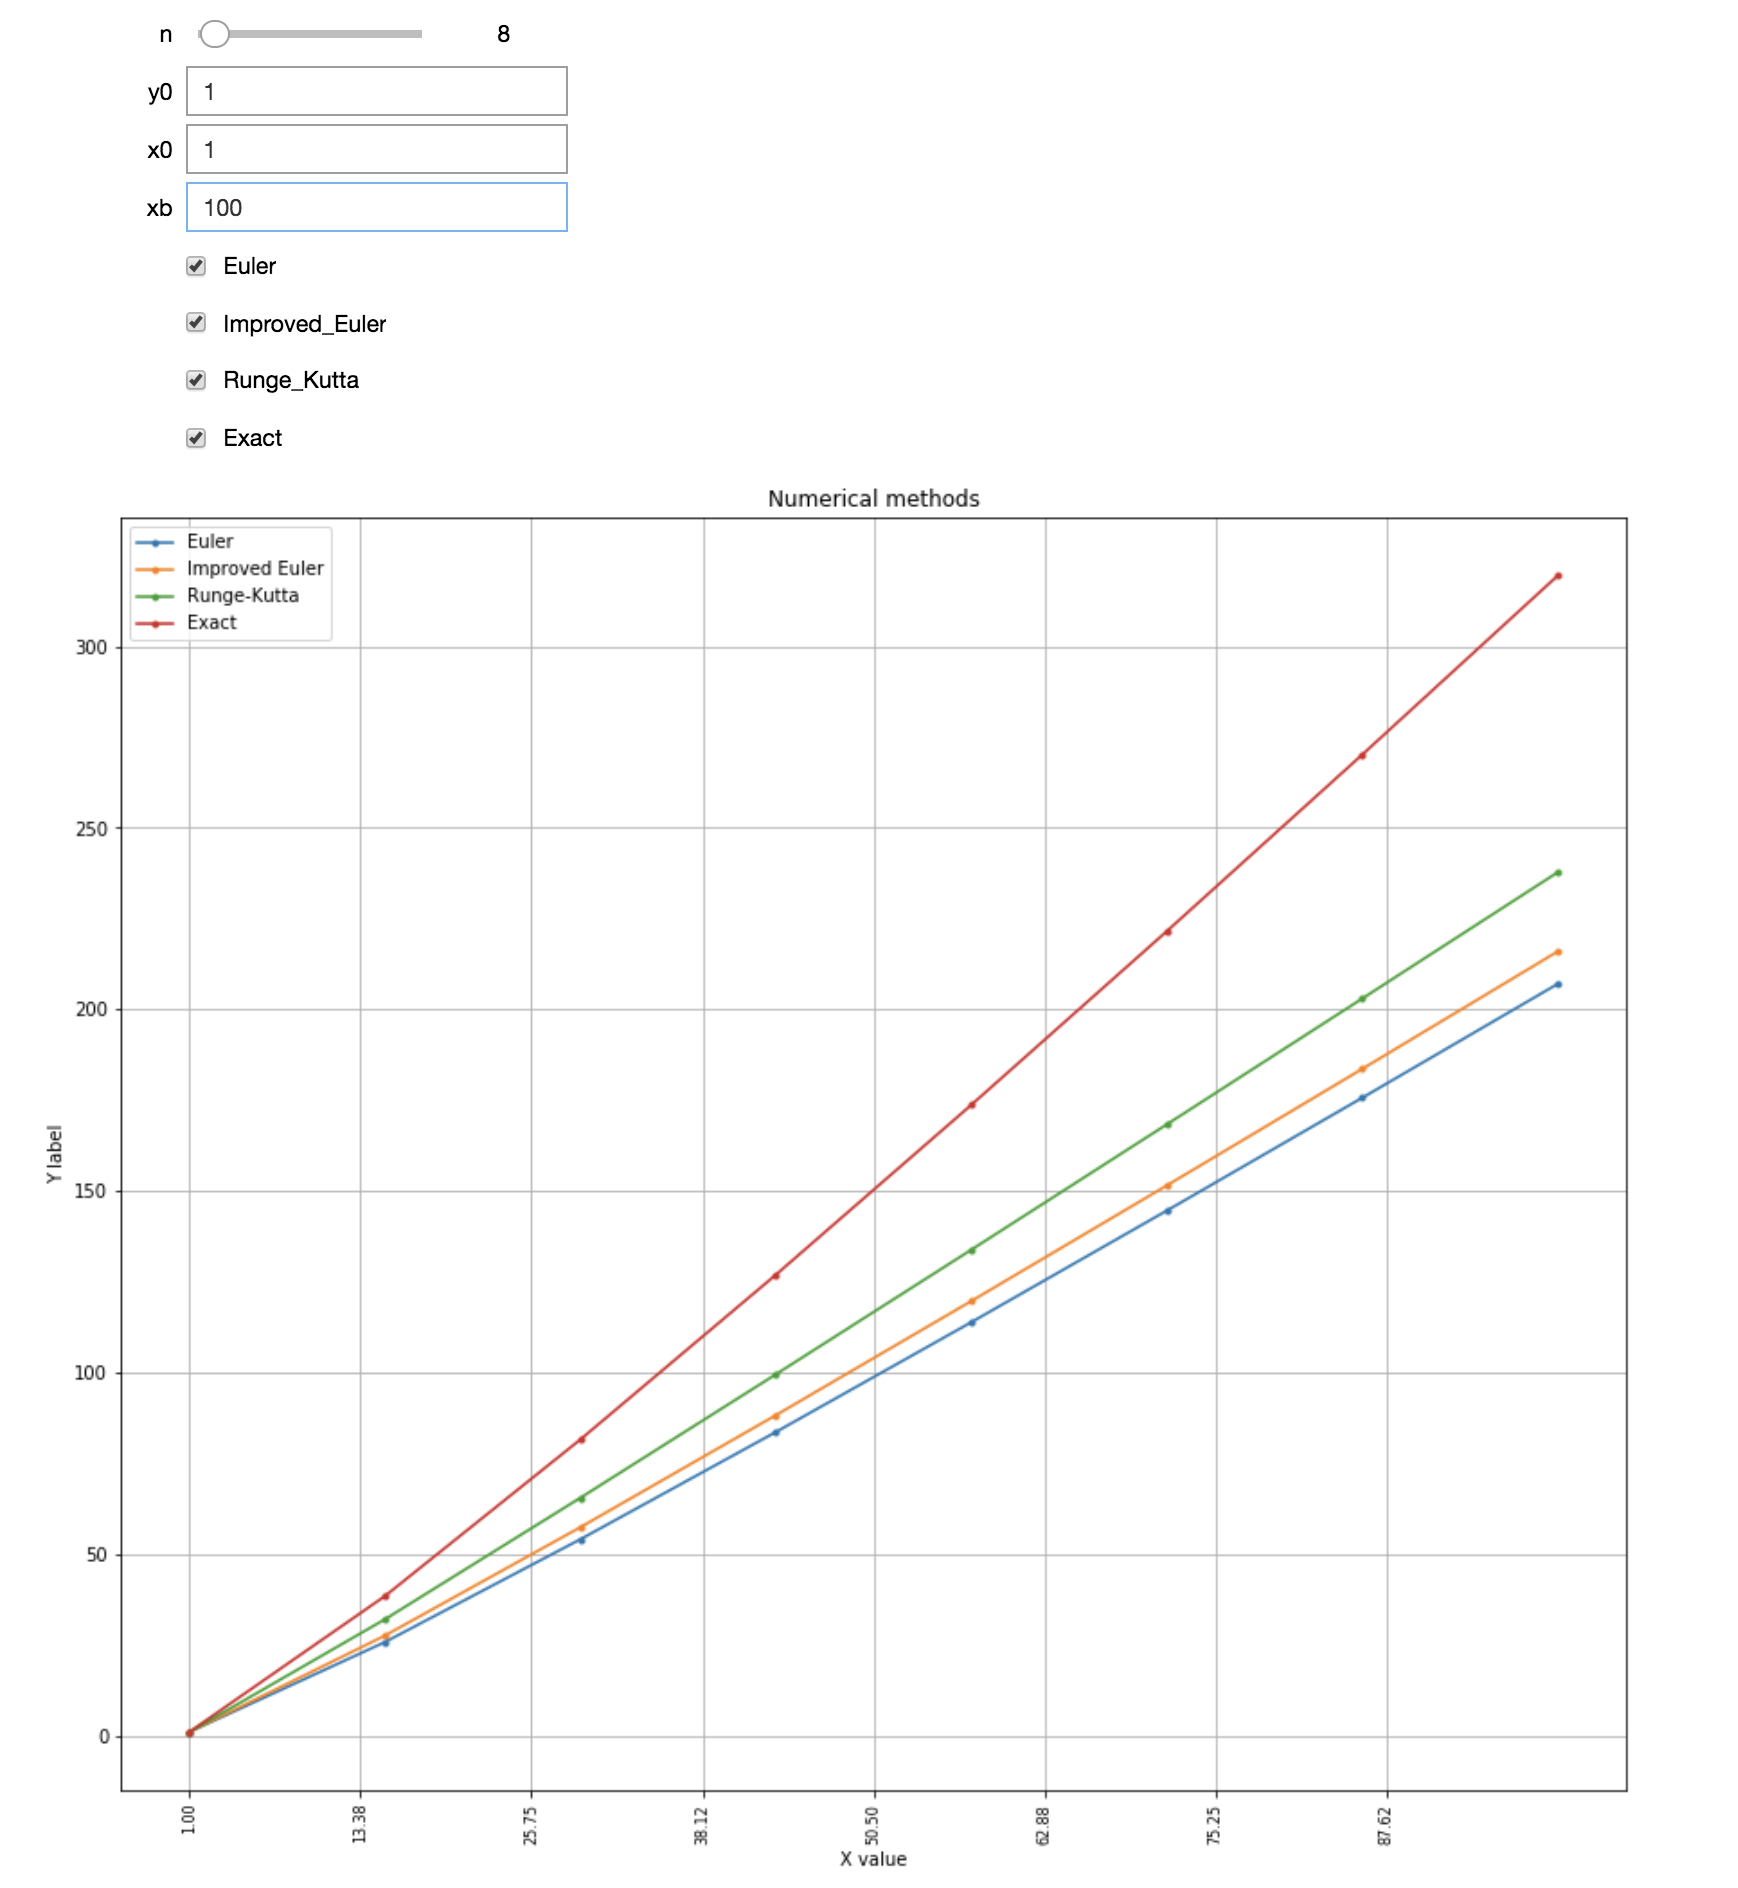

In [166]:
Image(filename='numerical.png')

Having large enough interval we can see that Runge-Kutta method remains closer to the exact functions than the rest (initial values and grid size are adjustible), obviously, the further -  the greater the error

And this is the result with the default initial values (still very close)

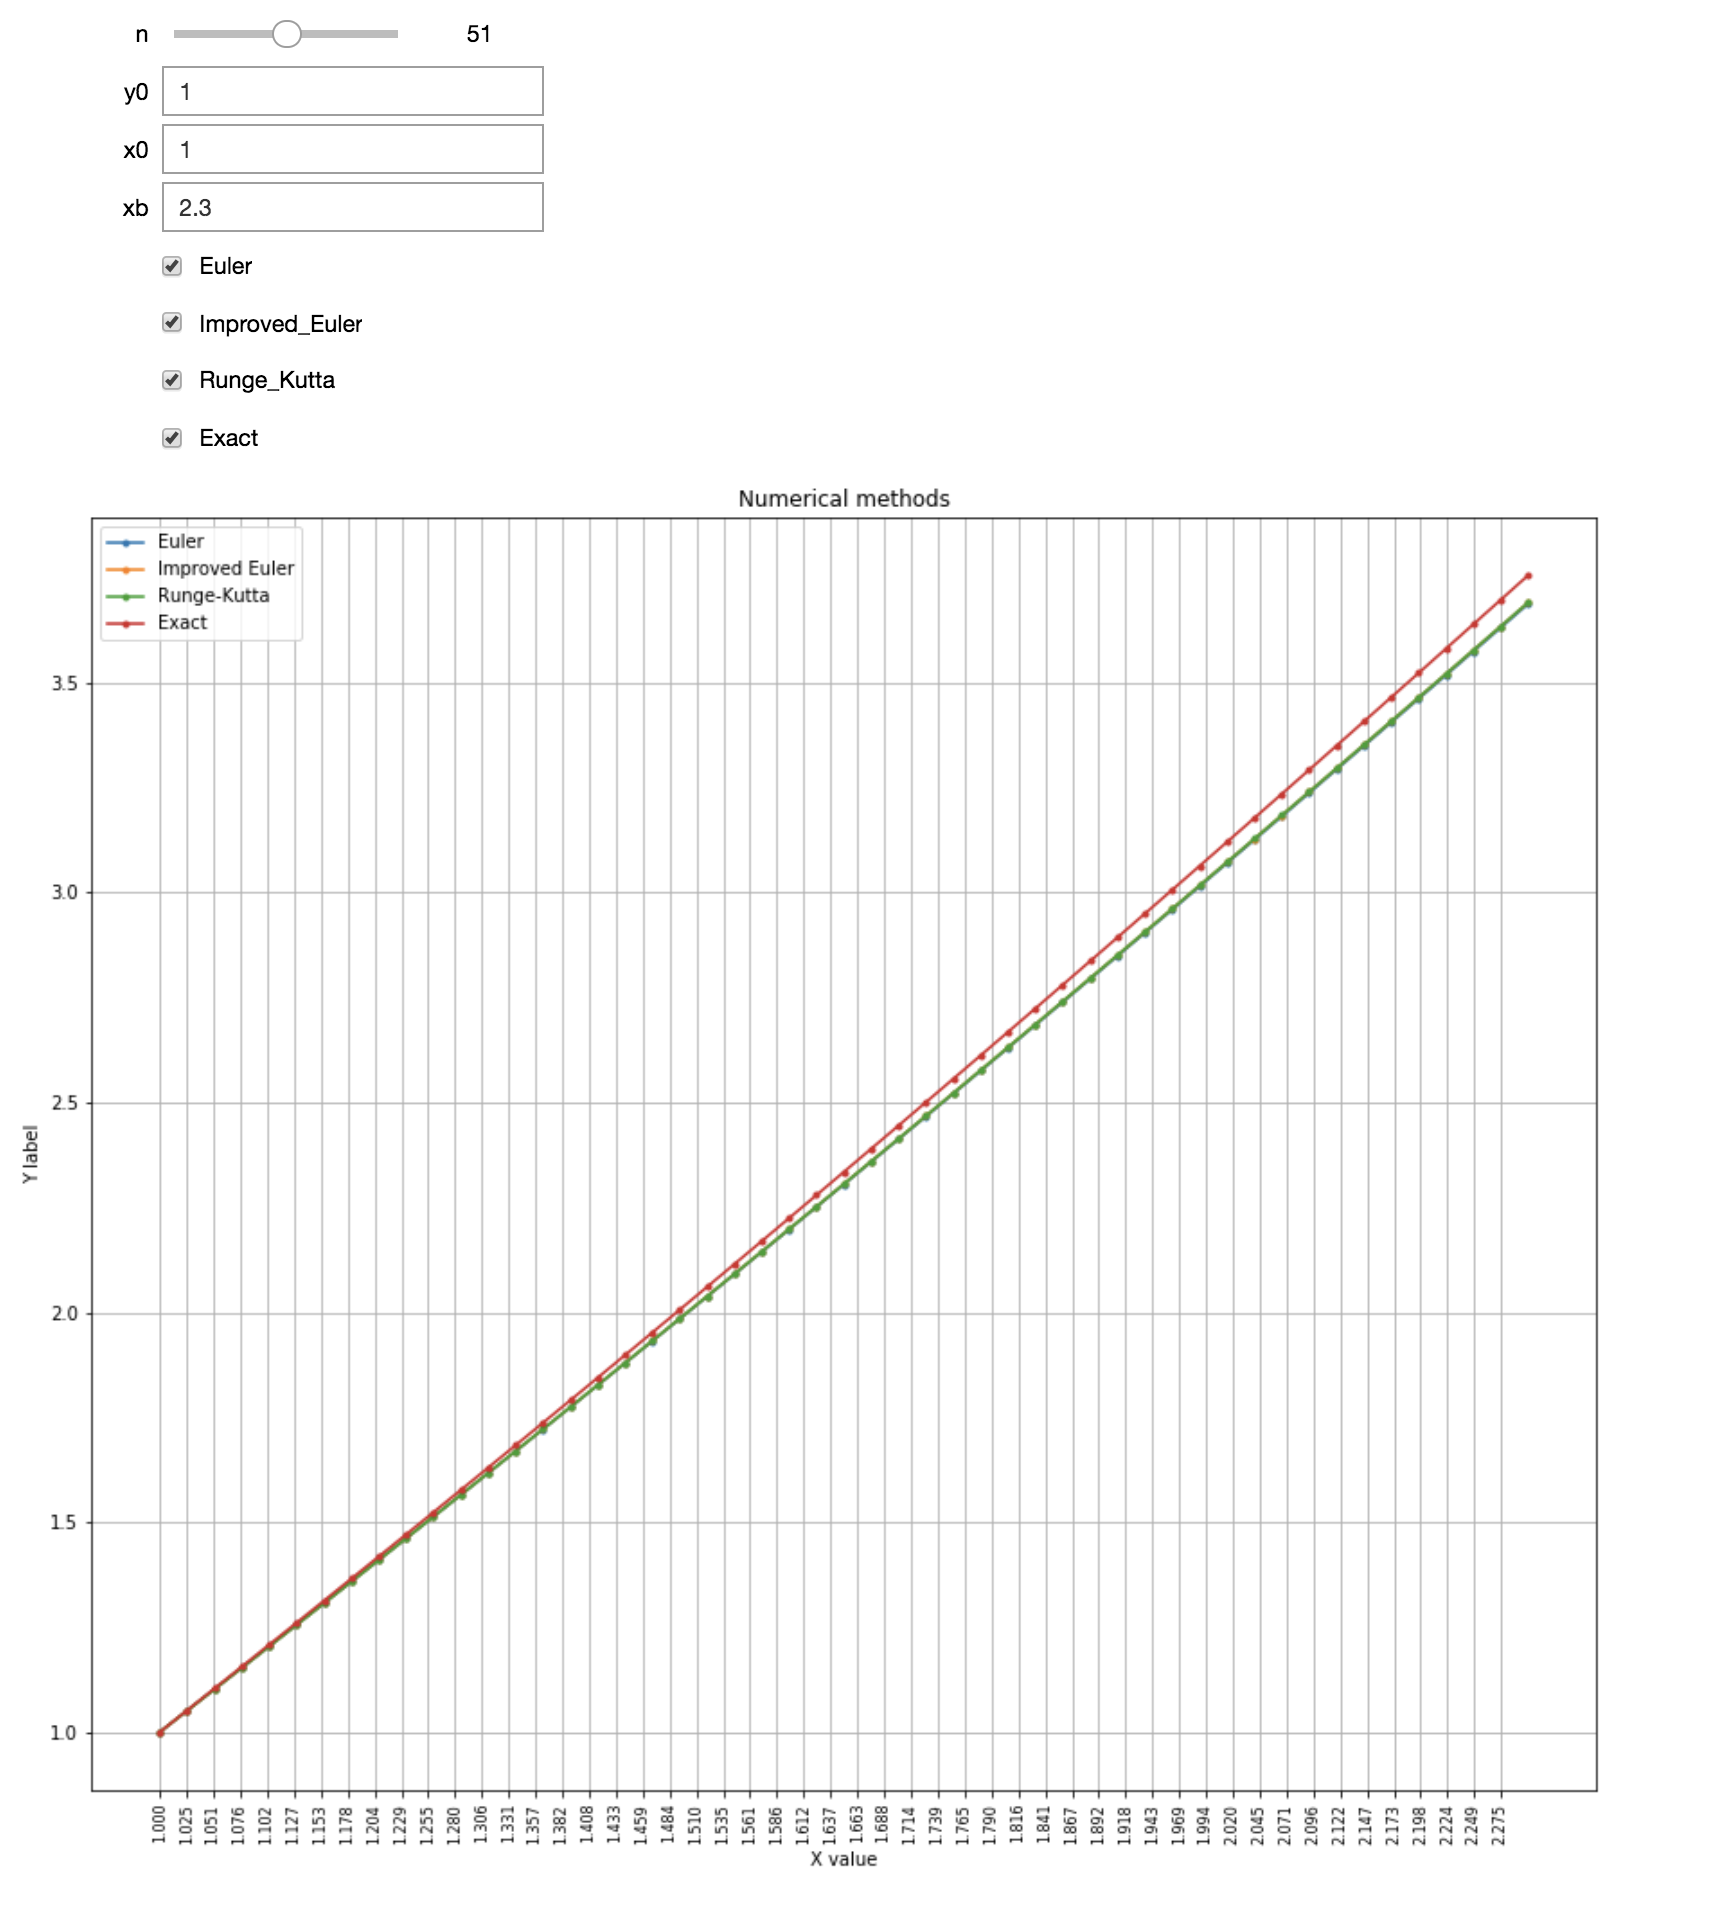

In [167]:
Image(filename='ivp.png')

Here we can compare the global trucantion error for the values given. As we see, Runge-Kutta method performs better.

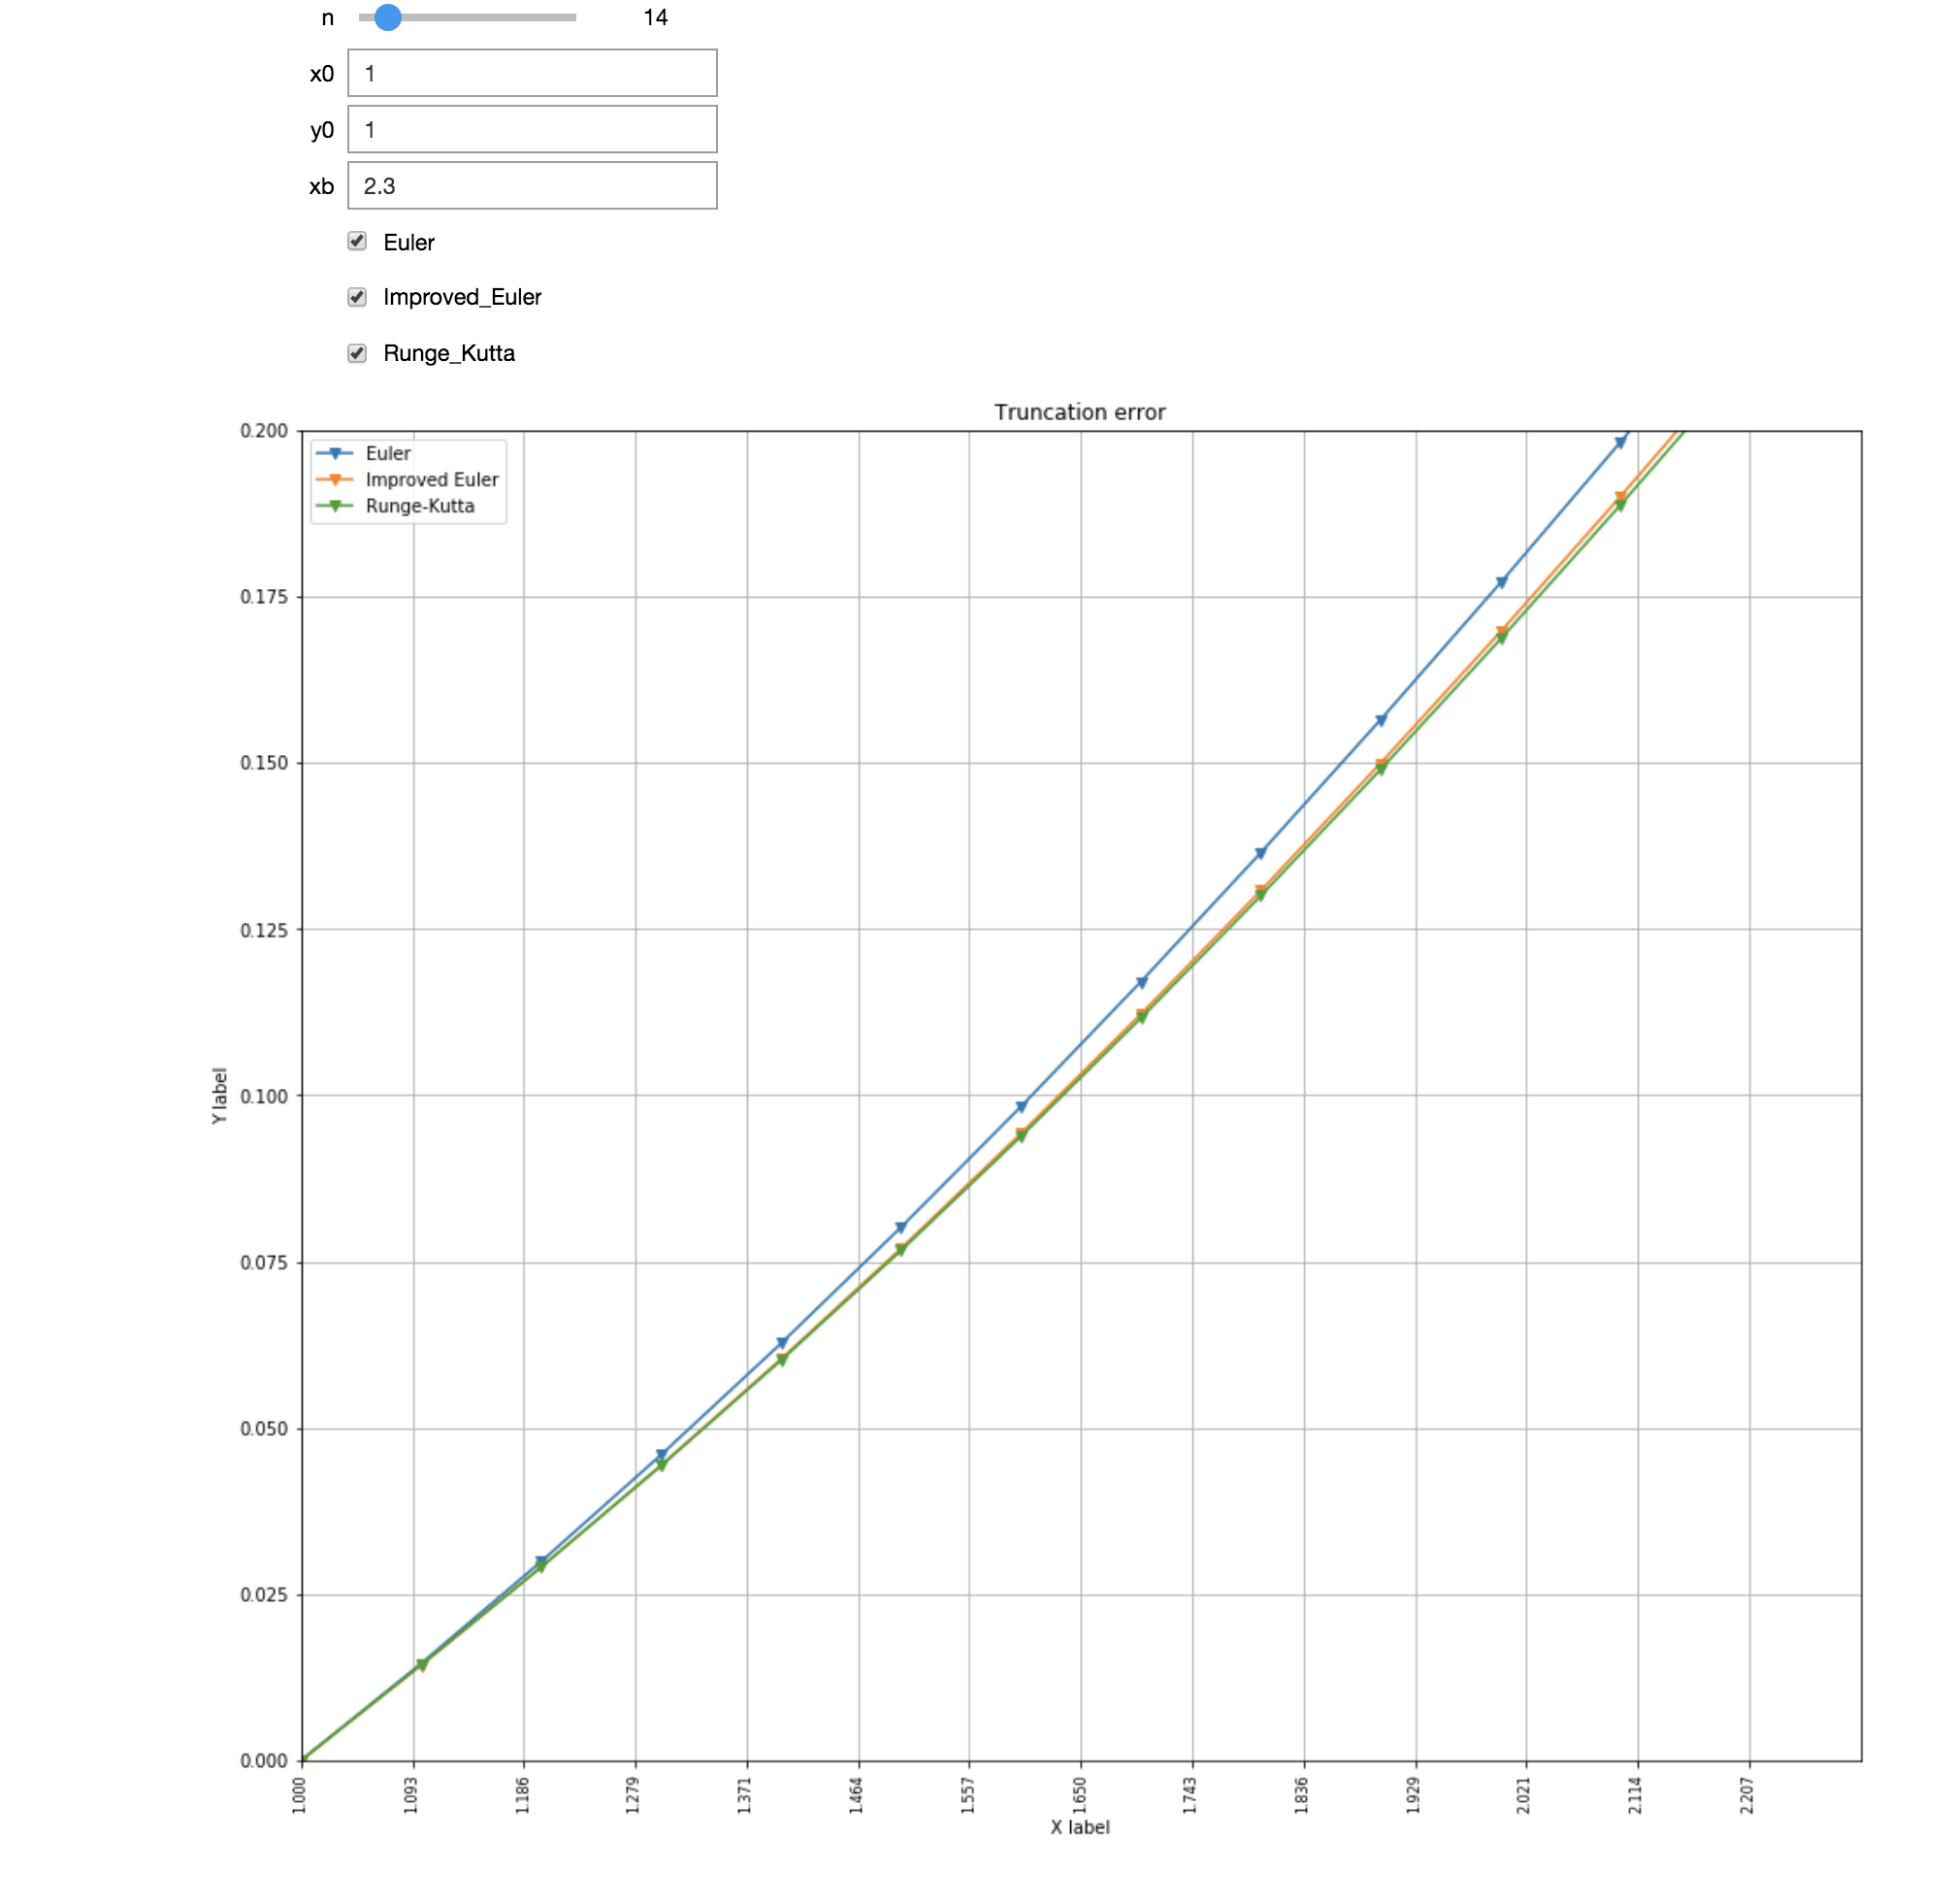

In [168]:
Image(filename='trunc.png')

And as the number of step increses - the value descreases, like here:

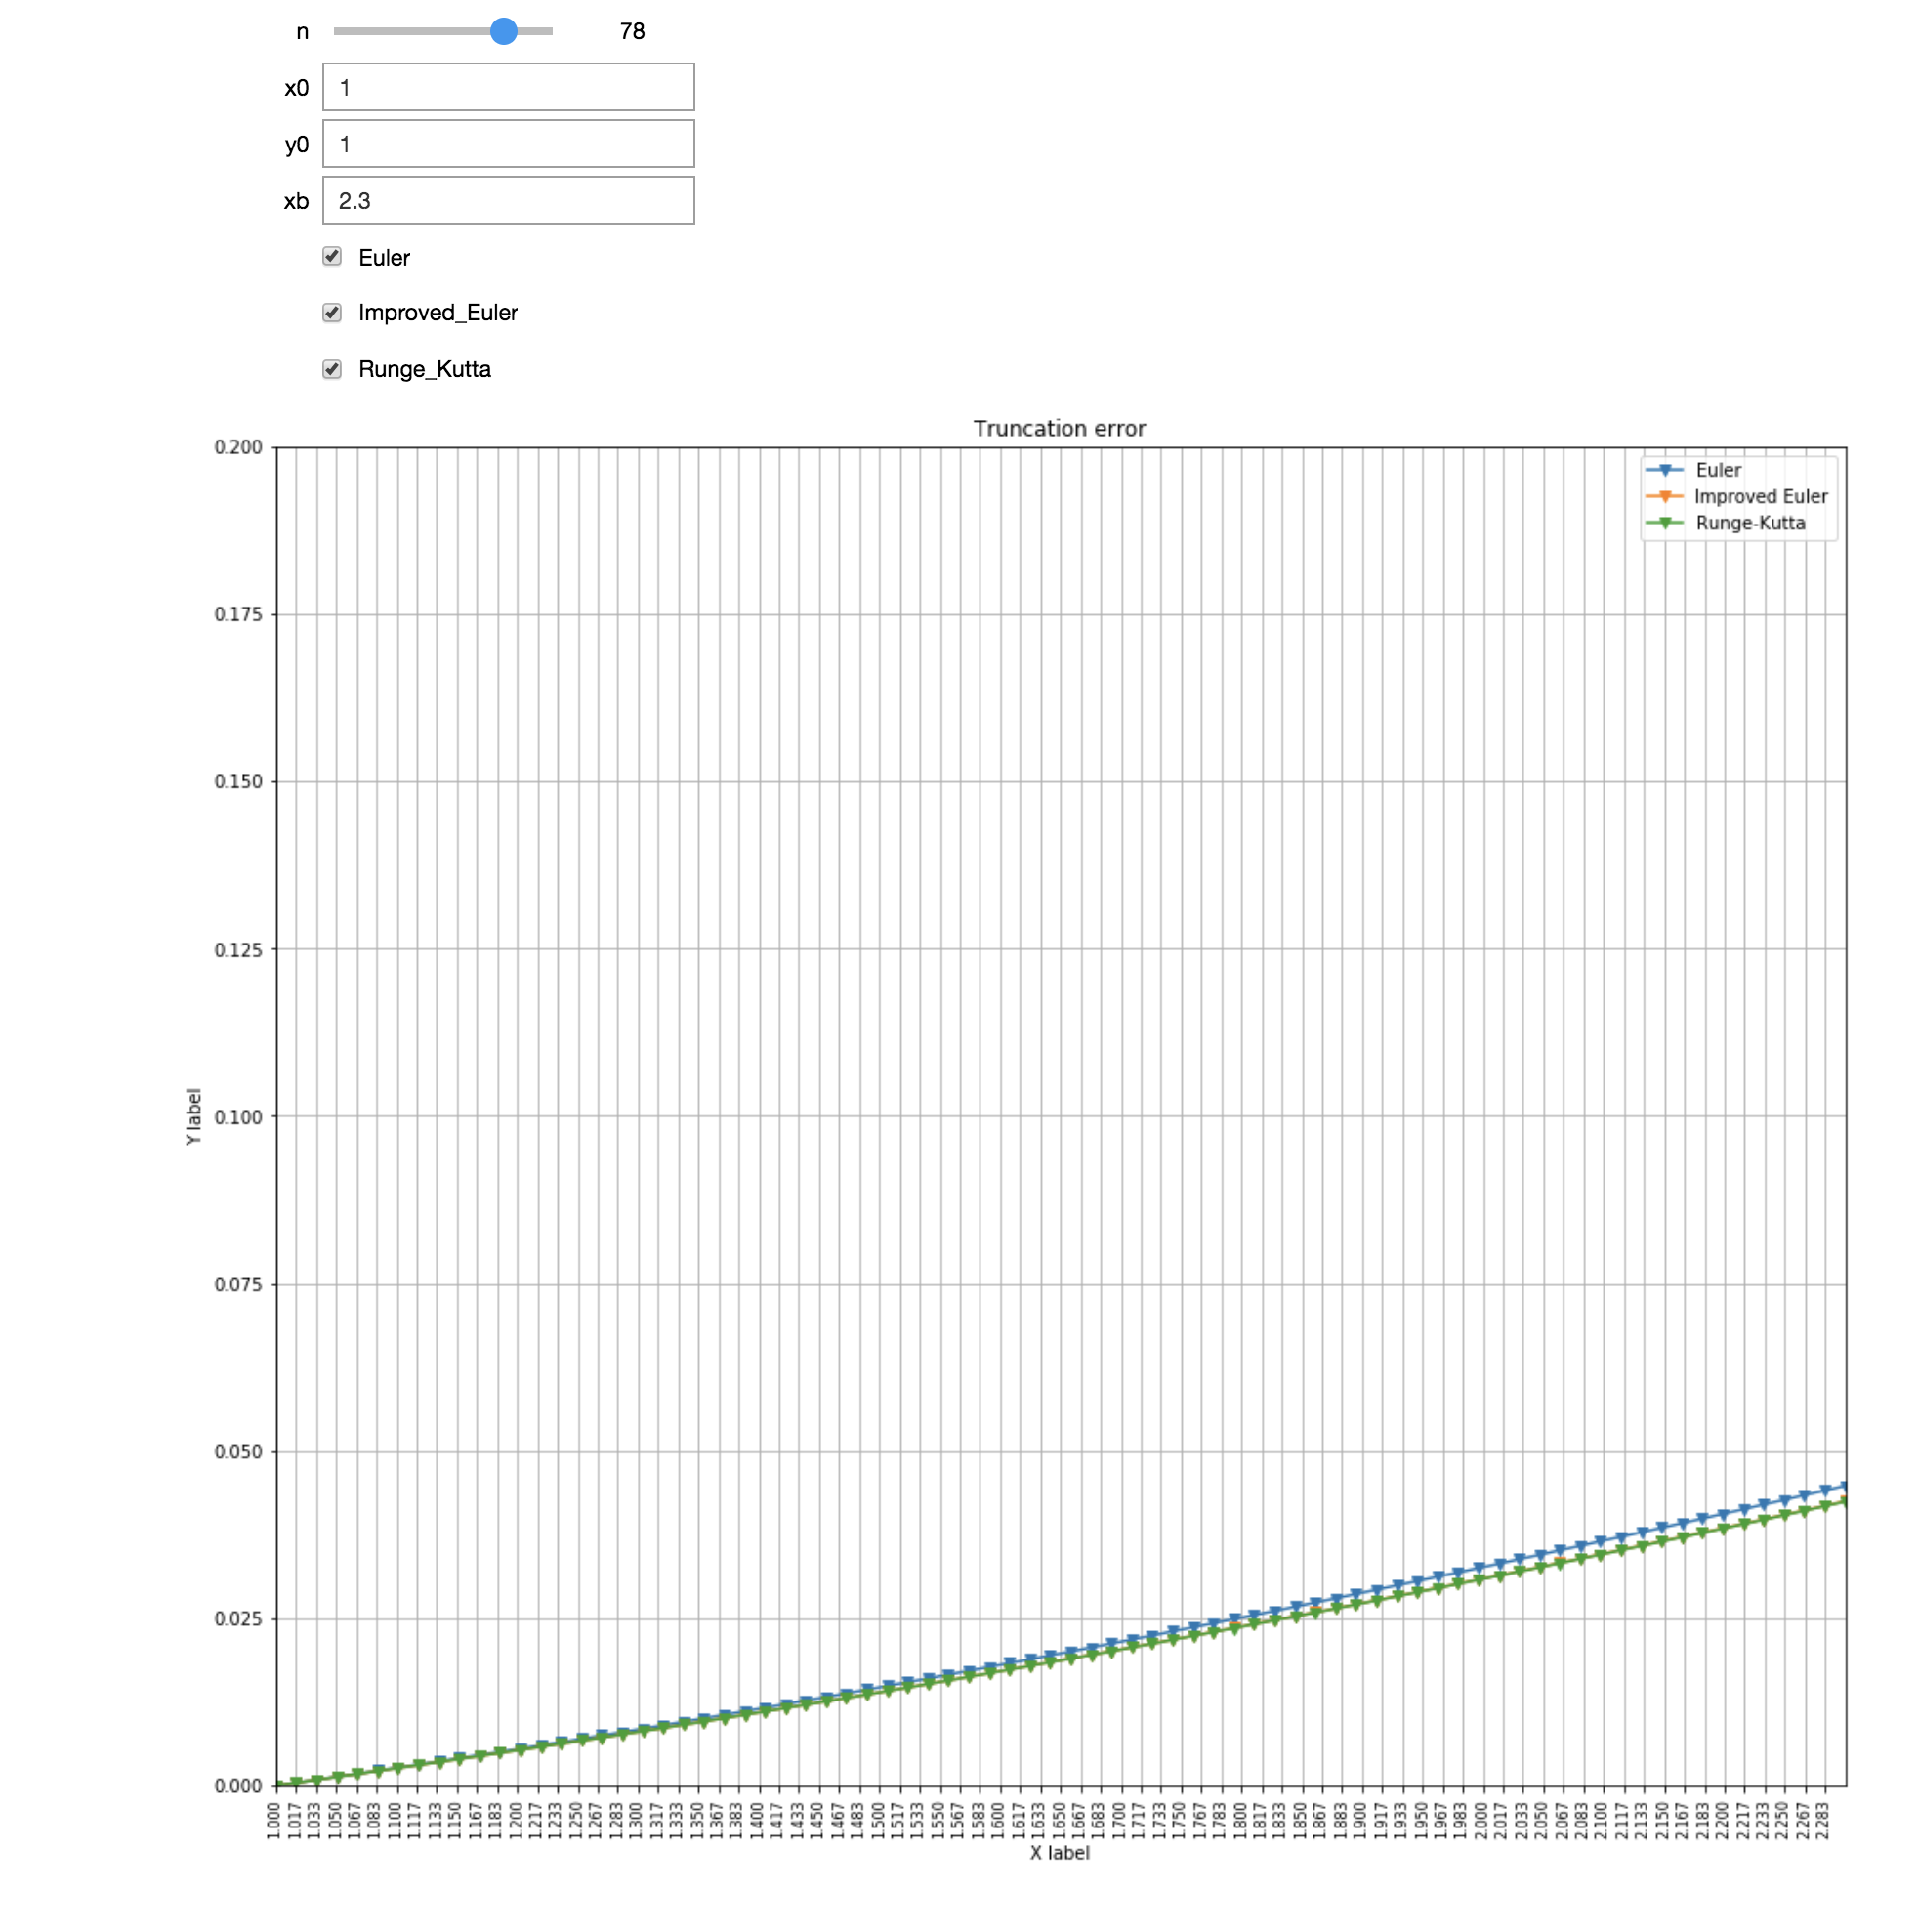

In [169]:
Image(filename='increase.png')

**Result**:Again, Runge-Kutte method has shown better performance

# Source code



In [170]:
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x,y):
        return y/x + x/y
    
def euler(n, y0, x0, xb):
    h = (xb-x0)/float(n)
    x = np.linspace(x0, xb, n)
    y = np.zeros([n])
    y[0] = y0
    for i in range (1,n):
        y[i] = y[i-1] + h*f(x[i-1], y[i-1])
 
    return [x, y]
    
def runge_kutta(n, y0, x0, xb):
    h = (xb-x0)/float(n)
    x = np.linspace(x0, xb, n)
    y = np.zeros([n])
    y[0] = y0
    for i in range (1,n):
        k1 = h*f(x[i-1], y[i-1])
        k2 = h*f(x[i-1] + (h*0.5), y[i-1] + (k1*0.5))
        k3 = h*f(x[i-1] + (h*0.5), y[i-1] + (k2*0.5))
        k4 = h*f(x[i-1] + h, y[i-1] + k3)
        delta_y = (k1+2*k2+2*k3+k4)/6
        y[i] = y[i-1] + delta_y
    return [x,y]

def improved_euler(n, y0, x0, xb):
    h = (xb-x0)/float(n)
    x = np.linspace(x0, xb, n)
    y = np.zeros([n])
    y_p = np.zeros([n])
    y_p[0]=-1
    y[0] = y0
    for i in range (1,n):
        y_p[i]=y[i-1] + h*f(x[i-1], y[i-1])
        y[i] = y[i-1] + (h/2)*(f(x[i-1], y[i-1]) + f(x[i], y_p[i]))
 
    return [x,y]
def exact(n, y0, x0, xb):
    c1=(y0/x0)**2 - 2*math.log(x0)

    #h = 0.1
    h = (xb-x0)/float(n)
    x = np.linspace(x0, xb, n)
    y = np.zeros([n])
    y[0] = y0
    for i in range (0, n):
        y[i] = x[i]*math.sqrt(c1+math.log(x[i]**2))
    return [x,y]
def graph(n, y0, x0, xb, Euler, Improved_Euler, Runge_Kutta, Exact)  : 
    
    x0 = float(x0)
    y0 = float(y0)
    xb = float(xb)
    n = int(n)
    h = (xb-x0)/float(n)
    %matplotlib inline
    [x_e, y_e] = euler(n, y0, x0, xb)
    [x_ie, y_ie] = improved_euler(n, y0, x0, xb)
    [x_rk, y_rk] = runge_kutta(n, y0, x0, xb)
    [x, y] = exact(n, y0, x0, xb)
    plt.rcParams["figure.figsize"] = (15,13)
    if Euler:
        plt.plot(x_e,y_e,marker='.', label = "Euler")
    if Improved_Euler:
        plt.plot(x_ie, y_ie, marker ='.', label="Improved Euler")
    if Runge_Kutta:
        plt.plot(x_rk, y_rk, marker='.', label = "Runge-Kutta")
    if Exact:
        plt.plot(x, y,marker='.', label="Exact")
    plt.xticks(np.arange(x0, xb, step=h),rotation='vertical', fontsize=8)
    plt.grid( linestyle='-')
    plt.legend()
    plt.xlabel('X value')
    plt.ylabel('Y label')
    plt.title("Numerical methods")
    plt.show()
interactive_plot = interactive(graph, n=(2,100), y0='1', x0='1', xb='2.3', Euler = True, Improved_Euler=True, Runge_Kutta=True, Exact=True)
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

interactive(children=(IntSlider(value=51, description='n', min=2), Text(value='1', description='y0'), Text(val…

In [171]:
def err(n, x0, y0, xb, Euler, Improved_Euler, Runge_Kutta): #in here we just calculate the difference between yi and y(xi)
    def sub(a,b):
        e = np.zeros([len(a)])
        for i in range(len(a)):
            e[i] = abs(a[i] -b[i])
        return e
    x0 = float(x0)
    y0=float(y0)
    xb=float(xb)
    h = (xb-x0)/float(n)
    
    %matplotlib inline
    [x_e, y_e] = [euler(n, y0, x0, xb)[0], sub(euler(n, y0, x0, xb)[1], exact(n, y0, x0, xb)[1])]
    [x_ie, y_ie] = [improved_euler(n, y0, x0, xb)[0], sub(improved_euler(n, y0, x0, xb)[1], exact(n, y0, x0, xb)[1])]
    [x_rk, y_rk] = [runge_kutta(n, y0, x0, xb)[0], sub(runge_kutta(n, y0, x0, xb)[1], exact(n, y0, x0, xb)[1])]
    #[x, y] = exact(h)
    plt.rcParams["figure.figsize"] = (16,14)
    if Euler:
        plt.plot(x_e,y_e,marker='v', label = "Euler")
    if Improved_Euler:
        plt.plot(x_ie, y_ie, marker ='v', label="Improved Euler")
    if Runge_Kutta:
        plt.plot(x_rk, y_rk, marker='v', label = "Runge-Kutta")

    plt.legend()
    #plt.plot(x, y, 'r')
    plt.ylim(0,0.2)
    plt.xticks(np.arange(x0, xb, step=h),rotation='vertical', fontsize=8)
    plt.xlim(x0, xb)
    plt.grid( linestyle='-')
    plt.xlabel('X label')
    plt.ylabel('Y label')
    plt.title("Truncation error")
   
    plt.show()
interactive_plot = interactive(err, n=(2, 100), x0='1', y0='1', xb='2.3', Euler = True, Improved_Euler=True, Runge_Kutta=True)
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

interactive(children=(IntSlider(value=51, description='n', min=2), Text(value='1', description='x0'), Text(val…